In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as pt

### Loading our dataset
we have 60,0000 training images and 10,000 testing images

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


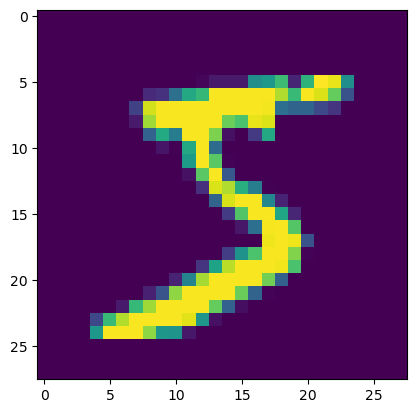

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
pt.imshow(x_train[0])

#### Since we need to train our neural network on this dataset we need to flatten our images using reshape function from tensorflow library

In [6]:
x_train=x_train.reshape(-1,784).astype("float32")/255.0 #since pixel values are ranging from o to 255 so normalise it to  [0,1] for faster training
x_test=x_test.reshape(-1,784).astype("float32")/255.0


In [7]:
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


#### For training a neural network we need to one hot encode the output labels also. after one hot encoding there will be 10 different values for 1 training sample and only 1 out of 10 is 1 else are 0

In [8]:
y_train=tf.keras.utils.to_categorical(y_train)
print(y_train.shape)
y_train[0]

(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_test=tf.keras.utils.to_categorical(y_test)
y_test.shape

(10000, 10)

#### Building the model

In [10]:
model_adam = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax'),# since it is a multi class classification
    ]
)

print(model_adam.summary())

model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None


In [11]:
batch_sizes_fraction = [0.002,0.005,0.1,0.5,1]


In [12]:
accuracy=[]
for i in batch_sizes_fraction:
    model_adam = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax'),# since it is a multi class classification
    ]
    )
    model_adam.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"],
    )   
    history=model_adam.fit(x_train,y_train,epochs=20,batch_size=int(i*60000),validation_data=(x_test, y_test),verbose=False)

    accuracy.append(history)

In [13]:
accuracy[0].history

{'loss': [0.214117631316185,
  0.11133851855993271,
  0.09070733934640884,
  0.07874199002981186,
  0.06835073232650757,
  0.06480778008699417,
  0.06277626752853394,
  0.05535496771335602,
  0.05302634462714195,
  0.050083812326192856,
  0.05152558162808418,
  0.047664061188697815,
  0.041844289749860764,
  0.041986819356679916,
  0.03760778531432152,
  0.043814342468976974,
  0.04422364756464958,
  0.03876907378435135,
  0.03834259882569313,
  0.035493019968271255],
 'accuracy': [0.9352333545684814,
  0.9660999774932861,
  0.9716333150863647,
  0.9765166640281677,
  0.9788500070571899,
  0.980650007724762,
  0.9818666577339172,
  0.9837333559989929,
  0.9847333431243896,
  0.9859499931335449,
  0.986299991607666,
  0.9869499802589417,
  0.9882833361625671,
  0.989216685295105,
  0.9901833534240723,
  0.989466667175293,
  0.9894999861717224,
  0.991016685962677,
  0.9912166595458984,
  0.991683304309845],
 'val_loss': [0.11968211829662323,
  0.1285591572523117,
  0.11412899196147919,


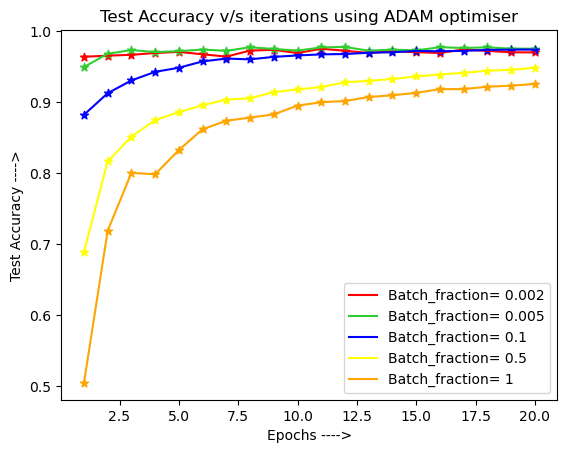

In [14]:
color_array=['red','limegreen','blue','yellow','orange','green']
for i in range(len(batch_sizes_fraction)): 
    pt.plot([_ for _ in range(1,21)],accuracy[i].history['val_accuracy'],color=color_array[i],label=f"Batch_fraction= {batch_sizes_fraction[i]}")
    pt.scatter([_ for _ in range(1,21)],accuracy[i].history['val_accuracy'],color=color_array[i],marker="*")

pt.xlabel("Epochs ---->")
pt.ylabel("Test Accuracy ---->")
pt.title("Test Accuracy v/s iterations using ADAM optimiser")
pt.legend()


In [15]:
accuracy=[]
for i in batch_sizes_fraction:
    model_sgd = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax'),# since it is a multi class classification
    ]
    )
    model_sgd.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.legacy.SGD(),
    metrics=["accuracy"],
    )   
    history=model_sgd.fit(x_train,y_train,epochs=20,batch_size=int(i*60000),validation_data=(x_test, y_test),verbose=False)
    accuracy.append(history)

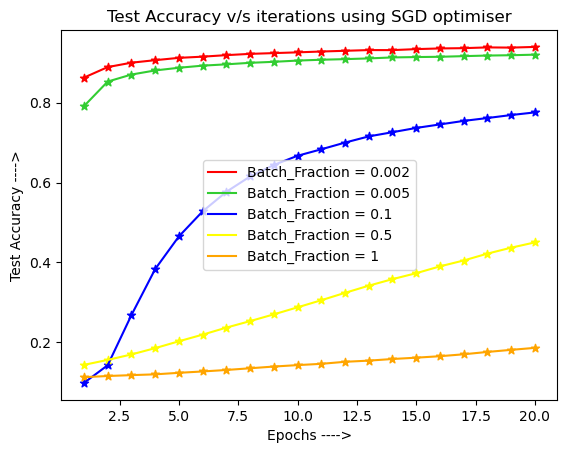

In [16]:
color_array=['red','limegreen','blue','yellow','orange','green']
for i in range(len(batch_sizes_fraction)): 
    pt.plot([_ for _ in range(1,21)],accuracy[i].history['val_accuracy'],color=color_array[i],label=f"Batch_Fraction = {batch_sizes_fraction[i]}")
    pt.scatter([_ for _ in range(1,21)],accuracy[i].history['val_accuracy'],color=color_array[i],marker="*")

pt.xlabel("Epochs ---->")
pt.ylabel("Test Accuracy ---->")
pt.title("Test Accuracy v/s iterations using SGD optimiser")
pt.legend()
pt.show()

In [17]:
accuracy=[]
for i in batch_sizes_fraction:
    model_rmsprop = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        layers.Dense(128,activation='relu'),
        layers.Dense(10,activation='softmax'),# since it is a multi class classification
    ]
    )
    model_rmsprop.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.legacy.RMSprop(),
    metrics=["accuracy"],
    )   
    history=model_rmsprop.fit(x_train,y_train,epochs=20,batch_size=int(i*60000),validation_data=(x_test, y_test),verbose=False)
    accuracy.append(history)

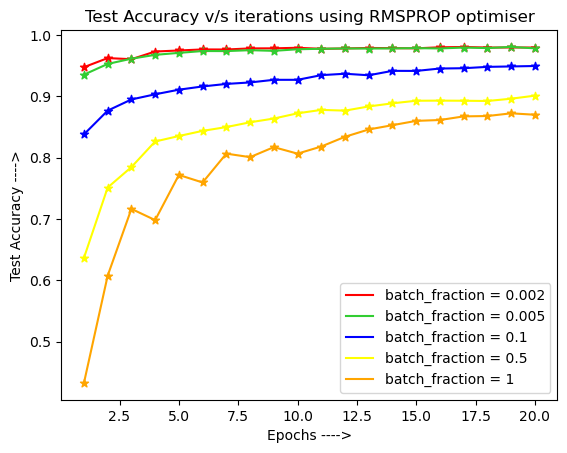

In [18]:
color_array=['red','limegreen','blue','yellow','orange','green']
for i in range(len(batch_sizes_fraction)): 
    pt.plot([_ for _ in range(1,21)],accuracy[i].history['val_accuracy'],color=color_array[i],label=f"batch_fraction = {batch_sizes_fraction[i]}")
    pt.scatter([_ for _ in range(1,21)],accuracy[i].history['val_accuracy'],color=color_array[i],marker="*")

pt.xlabel("Epochs ---->")
pt.ylabel("Test Accuracy ---->")
pt.title("Test Accuracy v/s iterations using RMSPROP optimiser")
pt.legend()
pt.show()

1. **SGD Optimization**:
   - Despite its simplicity, SGD alone often leads to slower convergence and lower accuracy compared to more advanced optimizers.
   - Careful tuning of momentum and learning rate scheduling parameters is essential to achieve optimal performance with SGD.

2. **ADAM Optimization**:
   - ADAM in this case outperforms SGD in terms of convergence speed and accuracy, even with default settings.
   - Its adaptive learning rate and momentum mechanisms make it particularly effective, especially in scenarios with large or noisy datasets.
   - However, excessive use of ADAM may lead to overfitting, so monitoring training progress and considering early stopping strategies is advisable.

3. **RMSPROP Optimization**:
   - RMSPROP exhibits comparable performance to ADAM in terms of accuracy but give better convergence characteristics in this case

